# International Sports Events: Window Dressing and Repression

In this assignment you will replicate partly a study on the relationship between repression in autocratic regimes and international sports events:

* Scharpf, A., Gläßel, C., Pearce, E. (2022) *International Sports Events and Repression in Autocracies: Evidence from the 1978 FIFA World Cup*, American Political Science Review, 1-18.  https://doi:10.1017/S0003055422000958.

Read the paper, locate, download, and familiarize yourself with the dataset provided by the authors at https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I. You should use the dataset in its archival format (`.tab`).

---

> Panos Louridas, Associate Professor <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> louridas@aueb.gr

## Questions

### Q1: Overview

Make sure you have the right data by replicating Table SI.3.1 and SI.3.2 of the Supporting Information.

Replicate Figure 1 of the main paper and Figure SI.1.1 from the Supporting Information.

### Q2: Repression in Departments with and without Host Cities

The authors formulate two hypotheses:

* H1: In the run-up to an international sports tournament, state repression spikes in host cities, but not in other cities.

* H2: During an international sports tourna- ment, state repression drops in host cities but remains unchanged in other cities.

They validate their hypotheses using a series of regression analyses. They use negative binomial regression models, but they find that their findings are robust with Ordinary Least Squares (OLS), so we'll use OLS in this assignment.

You will run the three first models of Table 1 of the main paper, which correpond to columns (1)-(3). You can find a partial report of the results in Table SI.4.1 of the Supporting Information; you should detail the control variables as in Table 1.

How do you interpret the results?

### Q3: Graphical Overview of Effects 

Replicate Figure 5 of the main paper using your own model. Moreover, enrich the figure by plotting also relevant information from the actual data (not predictions).

How do you interpret the results?

### Q4: Robustness Check Using a Dichotomous Indicator of Repression

As an additional robustness check, the authors run logistic regressions using a binary outcome variable for regression. They report their results in Table SI.4.5 of the Supplementary Information; replicate these results.

### Q5: Robustness Check Using Matched Samples

Another robustness check that the authors have undertaken is to run regression analyses on matched samples. They have created subsets of the data that pair similar departments with and without host cities. The matching has been carried out both manually, by using the range of population size, and algorithmically. We will focus on the simple, manual matching.

Replicate table SI.4.7 of the Supplementary Information and recreate Figure 6 of the main paper.

How do you interpret the results?

## Beginning of Assignment

### Q1: Overview

First of all, we import the libraries that we are going to need for this notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.pyplot as plt

we then import the main data table into a pandas dataframe

In [2]:
maindf = pd.read_table("dataverse_files/main_data.tab", parse_dates=["date"])
maindf

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
0,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
1,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
2,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
3,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
4,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133728,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133729,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133730,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN


then we select the columns that we will be using for the first table, we limit the data to the dates during and after the world cup and rename the columns

In [3]:
sumdf = maindf[["date", "repression", "lnrepression", "dumrepression", "hostcity", "prox_hotelonly", 
                    "prox_hotelpress", "time", "time2", "time3", "lnpop_1970", "literacy_avg", 
                    "vote_frejuli", "lnrebact1974", "lnrepression70_77", "latitude", "lnstrikes", 
                    "lnlag_strikes", "lnlag2_strikes", "zone1", "zone2","zone3", "zone4", "zone5"]]
sumdf = sumdf.loc[sumdf["date"] >= "1978-06-01"]
sumdf = sumdf.rename(columns={"repression" : "Repression_Events", "lnrepression" : "Repression_Events_ln",
                              "dumrepression" : "Repression_Events_bin", "hostcity" : "Host_City",
                              "prox_hotelonly" : "Proximity_to_Hotel", "prox_hotelpress" : "Proximity_to_Journalist_Venue",
                              "lnpop_1970" : "Population_Size_ln", "literacy_avg" : "Literacy_Rate", 
                              "vote_frejuli" : "Peronist_Vote_Share", "lnrebact1974" : "Rebel_Activity",
                              "lnrepression70_77" : "Past_Repression", "lnstrikes" : "Protest_Current", 
                              "lnlag_strikes" : "Protest_1Month", "lnlag2_strikes": "Protest_2Month",
                              "zone1" : "Military_Zone1", "zone2" : "Military_Zone2","zone3" : "Military_Zone3",
                              "zone4" : "Military_Zone4", "zone5" : "Military_Zone5"})
sumdf

,date,Repression_Events,Repression_Events_ln,Repression_Events_bin,Host_City,Proximity_to_Hotel,Proximity_to_Journalist_Venue,time,time2,time3,...,Past_Repression,latitude,Protest_Current,Protest_1Month,Protest_2Month,Military_Zone1,Military_Zone2,Military_Zone3,Military_Zone4,Military_Zone5
151,1978-06-01,0.0,0.0,0.0,0.0,6.274075,6.274075,0.93,0.8649,0.804357,...,1.098612,-37.199072,0.0,0.0,0.0,0,0,0,0,1
152,1978-06-02,0.0,0.0,0.0,0.0,6.274075,6.274075,0.94,0.8836,0.830584,...,1.098612,-37.199072,0.0,0.0,0.0,0,0,0,0,1
153,1978-06-03,0.0,0.0,0.0,0.0,6.274075,6.274075,0.95,0.9025,0.857375,...,1.098612,-37.199072,0.0,0.0,0.0,0,0,0,0,1
154,1978-06-04,0.0,0.0,0.0,0.0,6.274075,6.274075,0.96,0.9216,0.884736,...,1.098612,-37.199072,0.0,0.0,0.0,0,0,0,0,1
155,1978-06-05,0.0,0.0,0.0,0.0,6.274075,6.274075,0.97,0.9409,0.912673,...,1.098612,-37.199072,0.0,0.0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,1978-09-21,0.0,0.0,0.0,0.0,7.020316,7.089255,NaN,NaN,NaN,...,3.931826,-26.796579,0.0,0.0,0.0,0,0,1,0,0
133728,1978-09-22,0.0,0.0,0.0,0.0,7.020316,7.089255,NaN,NaN,NaN,...,3.931826,-26.796579,0.0,0.0,0.0,0,0,1,0,0
133729,1978-09-23,0.0,0.0,0.0,0.0,7.020316,7.089255,NaN,NaN,NaN,...,3.931826,-26.796579,0.0,0.0,0.0,0,0,1,0,0
133730,1978-09-24,0.0,0.0,0.0,0.0,7.020316,7.089255,NaN,NaN,NaN,...,3.931826,-26.796579,0.0,0.0,0.0,0,0,1,0,0


we then generate descriptive statistics for the dataframe and in order to replicate the S.I. 3.1 table we transpose the table, drop a few columns and rename some others

In [4]:
sumdffinal = sumdf.describe()
sumdffinal = sumdffinal.transpose()
sumdffinal = sumdffinal.drop(columns=["25%", "50%", "75%"])
sumdffinal = sumdffinal.rename(columns={"count" : "obs", "std" : "std_dev"})

In [5]:
sumdffinal

,obs,mean,std_dev,min,max
Repression_Events,58321.0,0.003858,0.096237,0.000000,9.000000
Repression_Events_ln,58321.0,0.002141,0.046726,0.000000,2.302585
Repression_Events_bin,58321.0,0.002366,0.048587,0.000000,1.000000
Host_City,58383.0,0.010020,0.099598,0.000000,1.000000
Proximity_to_Hotel,58321.0,7.005477,1.612787,0.000000,9.398466
Proximity_to_Journalist_Venue,58321.0,7.083793,1.627998,0.000000,9.398466
time,12475.0,1.050000,0.072114,0.930000,1.170000
time2,12475.0,1.107700,0.151510,0.864900,1.368900
time3,12475.0,1.174005,0.239637,0.804357,1.601613
Population_Size_ln,56628.0,9.701179,1.336451,6.056784,14.904898


In order to replicate table S.I. 3.2 we create a new dataframe with a certain few columns from the main dataframe, we limit the data to the rows that are during and after the world cup and rename some of the columns

In [6]:
postdf = maindf[["date", "repression", "lnrepression", "hostcity",
                "time_postwc", "time2_postwc", "time3_postwc", "lnpop_1970", "literacy_avg", 
                "vote_frejuli", "lnrebact1974", "lnrepression70_77",
                "zone1", "zone2","zone3", "zone4", "zone5"]]
postdf = postdf.loc[postdf["date"] >= "1978-06-01"]
postdf = postdf.rename(columns={"repression" : "Repression_Events", "lnrepression" : "Repression_Events_ln",
                                "hostcity" : "Host_City", "lnpop_1970" : "Population_Size_ln", 
                                "literacy_avg" : "Literacy_Rate", "vote_frejuli" : "Peronist_Vote_Share", 
                                "lnrebact1974" : "Rebel_Activity", "lnrepression70_77" : "Past_Repression",
                                "zone1" : "Military_Zone1", "zone2" : "Military_Zone2","zone3" : "Military_Zone3",
                                "zone4" : "Military_Zone4", "zone5" : "Military_Zone5"})
postdf

,date,Repression_Events,Repression_Events_ln,Host_City,time_postwc,time2_postwc,time3_postwc,Population_Size_ln,Literacy_Rate,Peronist_Vote_Share,Rebel_Activity,Past_Repression,Military_Zone1,Military_Zone2,Military_Zone3,Military_Zone4,Military_Zone5
151,1978-06-01,0.0,0.0,0.0,0.01,0.0001,9.999999e-07,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,0,1
152,1978-06-02,0.0,0.0,0.0,0.02,0.0004,7.999999e-06,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,0,1
153,1978-06-03,0.0,0.0,0.0,0.03,0.0009,2.700000e-05,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,0,1
154,1978-06-04,0.0,0.0,0.0,0.04,0.0016,6.399999e-05,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,0,1
155,1978-06-05,0.0,0.0,0.0,0.05,0.0025,1.250000e-04,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,1978-09-21,0.0,0.0,0.0,1.13,1.2769,1.442897e+00,NaN,NaN,NaN,2.833213,3.931826,0,0,1,0,0
133728,1978-09-22,0.0,0.0,0.0,1.14,1.2996,1.481544e+00,NaN,NaN,NaN,2.833213,3.931826,0,0,1,0,0
133729,1978-09-23,0.0,0.0,0.0,1.15,1.3225,1.520875e+00,NaN,NaN,NaN,2.833213,3.931826,0,0,1,0,0
133730,1978-09-24,0.0,0.0,0.0,1.16,1.3456,1.560896e+00,NaN,NaN,NaN,2.833213,3.931826,0,0,1,0,0


Then in order to create the binary value "Post_World_Cup_Period" we create a new row and assign 1 to the rows where the date is after the world cup and 0 to the ones where it's during the world cup

In [7]:
postdf['Post_World_Cup_Period'] = np.where(postdf.date > "1978-06-25", 1, 0)

Then we do the exact same thing that we did for the table S.I. 3.1 in order to replicate 3.2

In [8]:
postdffinal = postdf.describe()
postdffinal = postdffinal.transpose()
postdffinal = postdffinal.drop(columns=["25%", "50%", "75%"])
postdffinal = postdffinal.rename(columns={"count" : "obs", "std" : "std_dev"})

In [9]:
postdffinal

,obs,mean,std_dev,min,max
Repression_Events,58321.0,0.003858,0.096237,0.000000e+00,9.000000
Repression_Events_ln,58321.0,0.002141,0.046726,0.000000e+00,2.302585
Host_City,58383.0,0.010020,0.099598,0.000000e+00,1.000000
time_postwc,58383.0,0.590000,0.337740,1.000000e-02,1.170000
time2_postwc,58383.0,0.462167,0.411383,1.000000e-04,1.368900
time3_postwc,58383.0,0.407277,0.460040,9.999999e-07,1.601613
Population_Size_ln,56628.0,9.701179,1.336451,6.056784e+00,14.904898
Literacy_Rate,56628.0,0.717073,0.110344,3.157895e-01,0.900552
Peronist_Vote_Share,57447.0,58.752138,11.538778,2.850000e+01,94.300000
Rebel_Activity,58383.0,1.937065,2.068920,0.000000e+00,5.036952


We then import the .tab file from the given dataset in order to replicate table 1.1 of the supporting information

In [10]:
supdf = pd.read_table("dataverse_files/figure_SI11_data.tab")
supdf

,year,regime,baseline,democ,autoc
0,1987.0,0.0,2.5,3.0,NaN
1,1987.0,0.0,2.5,3.0,NaN
2,1991.0,0.0,2.5,3.0,NaN
3,1991.0,0.0,2.5,3.0,NaN
4,1995.0,1.0,2.5,NaN,2.0
...,...,...,...,...,...
328,2010.0,0.0,27.5,28.0,NaN
329,2014.0,0.0,27.5,28.0,NaN
330,2018.0,0.0,27.5,28.0,NaN
331,2018.0,0.0,27.5,28.0,NaN


We then create a column that is basically the subtraction of democ/autoc column from the baseline for each row in the dataframe

In [11]:
supdf['offset'] = np.where(supdf['regime']==1.0, -0.5, 0.5)

Finally, in order to plot the data we break the dataframe into two dataframes, one for democracies and one for autocracies and then plot the data using the 'baseline' column as the y axis value, and then draw lines on each distinct y value for each sport represented by those values

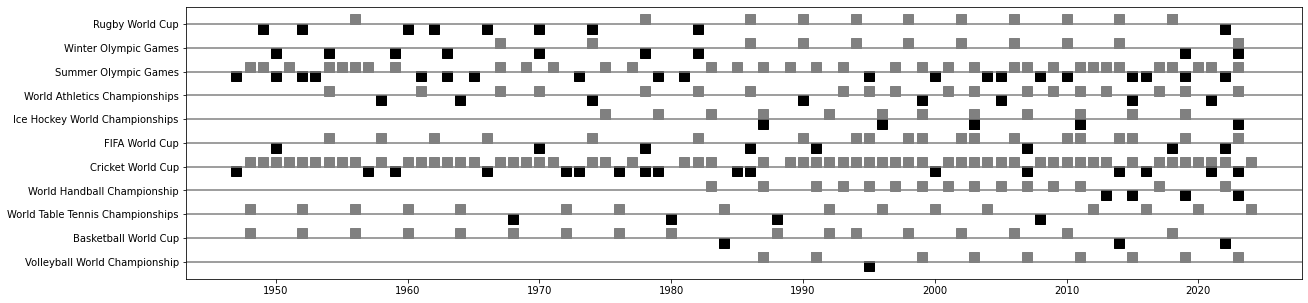

In [12]:
events = ["Volleyball World Championship", "Basketball World Cup",
              "World Table Tennis Championships", "World Handball Championship",
              "Cricket World Cup", "FIFA World Cup", 
              "Ice Hockey World Championships", "World Athletics Championships",
              "Summer Olympic Games", "Winter Olympic Games", "Rugby World Cup"]

dem_supdf = supdf[supdf.offset > 0]
autoc_supdf = supdf[supdf.offset < 0]

plt.figure(figsize=(20, 5))

plt.plot(dem_supdf.year, dem_supdf.baseline + dem_supdf.offset, 
         linestyle="None", marker="s", markersize=10, mfc="grey", mec="grey")

plt.plot(autoc_supdf.year, autoc_supdf.baseline + autoc_supdf.offset, 
         linestyle="None", marker="s", markersize=10, mfc="k", mec="k")


ticks = np.arange(2.5, 30, 2.5)
for height in ticks:
    plt.axhline(y=height, color="grey")

plt.yticks(ticks, events)
plt.show()

In order to replicate figure 1 we will simply be using the figure_1_data.tab file, creating a new column for the years values and plotting that column with the 'autochostperc' column

In [13]:
firstqdf = pd.read_table("dataverse_files/figure_1_data.tab")
years = ['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019', '2020-2024']
firstqdf ['years'] = years
firstqdf

,postcwy,event_selec,autochost,autochostperc,years
0,1.0,25.0,2.0,8.000000,1990-1994
1,2.0,31.0,4.0,12.903226,1995-1999
2,3.0,25.0,5.0,20.000000,2000-2004
3,4.0,24.0,6.0,25.000000,2005-2009
4,5.0,30.0,6.0,20.000000,2010-2014
5,6.0,32.0,9.0,28.125000,2015-2019
6,7.0,27.0,10.0,37.037037,2020-2024


(0.0, 50.0)

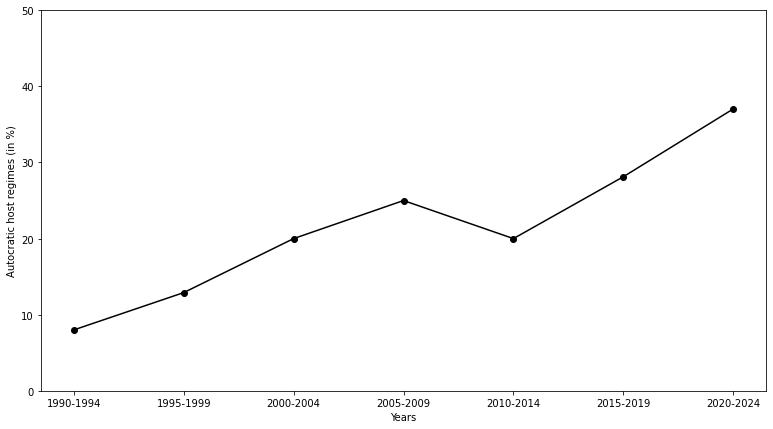

In [14]:
fig = plt.gcf()
fig.set_size_inches(13, 7)
plot1 = plt.plot(firstqdf['years'], firstqdf['autochostperc'], marker="o", color="black")
plt.xlabel('Years')
plt.ylabel('Autocratic host regimes (in %)')
plt.ylim([0, 50])

### Q2: Repression in Departments with and without Host Cities

We create our first model using hostcitytime, hostcitytime2, hostcity, time and time2

In [15]:
import statsmodels.formula.api as snf
columns1 = " ~ hostcitytime + hostcitytime2 + hostcity + time + time2"
columnsctrl = columns1 + " + literacy_avg + vote_frejuli + lnrebact1974 + lnrepression70_77"
columnszone = columnsctrl + " + zone1 + zone2 + zone3 + zone4 + zone5"
lnformulabase = "lnrepression" + columns1
model = snf.ols(lnformulabase, data = maindf)
res1 = model.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     554.0
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:32:40   Log-Likelihood:                 89824.
No. Observations:               58107   AIC:                        -1.796e+05
Df Residuals:                   58101   BIC:                        -1.796e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0026      0.001      3.912      0.000       0.001       0.004
hostcitytime      0.4012      0.026     15.680      0.000       0.351       0.451
hostcitytime2    -0.3230      0.021    -15.372      0.000      -0.364      -0.282
hostcity          0.0202      0.007      3.086      0.002       0.007       0.033
time             -0.0028      0.003     -1.106      0.269      -0.008       0.002
time2             0.0020      0.002      0.959      0.338      -0.002       0.006
==============================================================================
Omnibus:                   125118.610   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        514921392.904
Skew:                          19.504   Prob(JB):                         0.00
Kurtosis:                     462.518   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We then add the control variables (literacy_avg, vote_frejuli, lnrebact1974, lnrepression70_77)

In [16]:
lnformulactrl = "lnrepression" + columnsctrl
model = snf.ols(lnformulactrl, data = maindf)
res2 = model.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     389.1
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:32:41   Log-Likelihood:                 87274.
No. Observations:               56628   AIC:                        -1.745e+05
Df Residuals:                   56618   BIC:                        -1.744e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0038      0.003      1.356      0.175      -0.002       0.009
hostcitytime          0.4014      0.026     15.612      0.000       0.351       0.452
hostcitytime2        -0.3231      0.021    -15.305      0.000      -0.364      -0.282
hostcity             -0.0034      0.007     -0.511      0.609      -0.016       0.010
time                 -0.0030      0.003     -1.161      0.246      -0.008       0.002
time2                 0.0022      0.002      1.007      0.314      -0.002       0.006
literacy_avg         -0.0038      0.003     -1.375      0.169      -0.009       0.002
vote_frejuli      -3.731e-05    2.3e-05     -1.621      0.105   -8.24e-05    7.79e-06
lnrebact1974      -6.027e-05      0.000     -0.427      0.669      -0.000       0.000
lnrepression70_77     0.0046      0.000     25.053      0.000       0.004       0.005
==============================================================================
Omnibus:                   120581.536   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        468542387.264
Skew:                          19.008   Prob(JB):                         0.00
Kurtosis:                     446.995   Cond. No.                     9.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Finally we add the military zones to our third model

In [17]:
lnformulazone = "lnrepression" + columnszone
model = snf.ols(lnformulazone, data = maindf)
res3 = model.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     283.6
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:32:41   Log-Likelihood:                 87360.
No. Observations:               56628   AIC:                        -1.747e+05
Df Residuals:                   56614   BIC:                        -1.746e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0058      0.003      2.103      0.035       0.000       0.011
hostcitytime          0.4014      0.026     15.635      0.000       0.351       0.452
hostcitytime2        -0.3231      0.021    -15.328      0.000      -0.364      -0.282
hostcity             -0.0034      0.007     -0.506      0.613      -0.016       0.010
time                 -0.0030      0.003     -1.163      0.245      -0.008       0.002
time2                 0.0022      0.002      1.008      0.313      -0.002       0.006
literacy_avg         -0.0107      0.003     -3.440      0.001      -0.017      -0.005
vote_frejuli       1.287e-05   2.78e-05      0.463      0.643   -4.16e-05    6.73e-05
lnrebact1974         -0.0009      0.000     -5.532      0.000      -0.001      -0.001
lnrepression70_77     0.0049      0.000     24.950      0.000       0.005       0.005
zone1                 0.0078      0.001      9.465      0.000       0.006       0.009
zone2                -0.0015      0.001     -2.287      0.022      -0.003      -0.000
zone3                -0.0011      0.001     -1.245      0.213      -0.003       0.001
zone4                -0.0002      0.002     -0.117      0.907      -0.003       0.003
zone5                 0.0007      0.001      0.955      0.340      -0.001       0.002
==============================================================================
Omnibus:                   120377.988   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        464147526.917
Skew:                          18.934   Prob(JB):                         0.00
Kurtosis:                     444.905   Cond. No.                     7.42e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.67e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Looking at the values of the coefficients alone, we can see that the hostcitytime column makes the biggest statistical difference in whether there are repression effects or not, which leads us to further look into how the number of repression events change in host and non-host cities seperately, while taking time into consideration (seeing how the numbers shift from before the world cup to during/after it)

### Q3: Graphical Overview of Effects 

For this question we will take our original dataframe from when we imported the main data in the first question and split it in two dataframes, one for host cities and one for non host cities, then group them by date after getting rid of rows with nan values in certain columns

In [18]:
hostdf = maindf[maindf.hostcity==1]
nonhostdf = maindf[maindf.hostcity==0]
columns = ["repression", "hostcitytime", "hostcity", "time"]
hostdf = hostdf.dropna(subset = columns)
nonhostdf = nonhostdf.dropna(subset = columns)
nonhostdf = nonhostdf.groupby(by="date").mean()
hostdf = hostdf.groupby(by="date").mean()

We then fit a model almost identical to the third one from Q2 (this time using repression instead of lnrepression)

In [19]:
formulazone = "repression" + columnszone
model = snf.ols(formulazone, data = maindf)
res4 = model.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             repression   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     244.4
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:32:41   Log-Likelihood:                 48724.
No. Observations:               56628   AIC:                        -9.742e+04
Df Residuals:                   56614   BIC:                        -9.729e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0096      0.005      1.775      0.076      -0.001       0.020
hostcitytime          0.9026      0.051     17.769      0.000       0.803       1.002
hostcitytime2        -0.7119      0.042    -17.071      0.000      -0.794      -0.630
hostcity             -0.0470      0.013     -3.578      0.000      -0.073      -0.021
time                 -0.0064      0.005     -1.240      0.215      -0.017       0.004
time2                 0.0046      0.004      1.093      0.274      -0.004       0.013
literacy_avg         -0.0191      0.006     -3.114      0.002      -0.031      -0.007
vote_frejuli       3.507e-05    5.5e-05      0.638      0.523   -7.27e-05       0.000
lnrebact1974         -0.0016      0.000     -5.057      0.000      -0.002      -0.001
lnrepression70_77     0.0085      0.000     21.789      0.000       0.008       0.009
zone1                 0.0146      0.002      8.963      0.000       0.011       0.018
zone2                -0.0023      0.001     -1.818      0.069      -0.005       0.000
zone3                -0.0018      0.002     -1.029      0.303      -0.005       0.002
zone4                -0.0024      0.003     -0.778      0.436      -0.009       0.004
zone5                 0.0016      0.001      1.048      0.295      -0.001       0.004
==============================================================================
Omnibus:                   145513.233   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3501167322.475
Skew:                          29.363   Prob(JB):                         0.00
Kurtosis:                    1219.721   Cond. No.                     7.42e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.67e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We then use the model to get predictions for the host and non host cities respectively and merge the summary dataframes with the host/nonhost city dataframes

In [20]:
predictions = res4.get_prediction(hostdf)
preddf = predictions.summary_frame(alpha=0.05)
preddf.index = hostdf.index
hostdf = pd.concat([hostdf, preddf], axis=1)

In [21]:
predictions = res4.get_prediction(nonhostdf)
preddf = predictions.summary_frame(alpha=0.05)
preddf.index = nonhostdf.index
nonhostdf = pd.concat([nonhostdf, preddf], axis=1)

We then plot the data in a similar way to figure 5

<Figure size 1440x720 with 0 Axes>

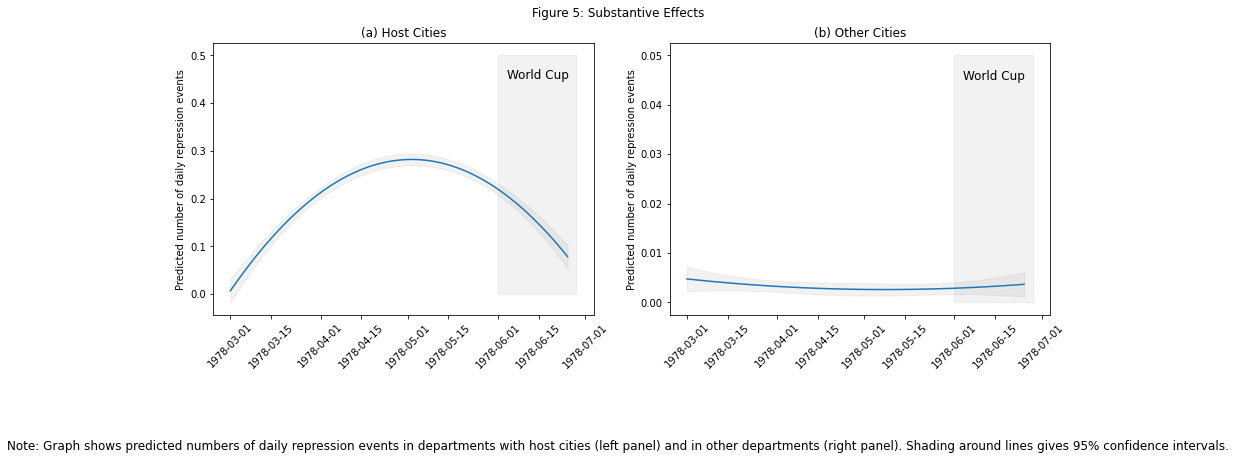

In [22]:
note = "Note: Graph shows predicted numbers of daily repression events in departments with host cities (left panel) and in other departments (right \
panel). Shading around lines gives 95% confidence intervals."

plt.figure(figsize=(20,10))
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
fig.suptitle("Figure 5: Substantive Effects")
plt.figtext(0.5, -0.25, note, wrap=True, horizontalalignment='center', fontsize=12)

ax1.plot(hostdf['mean'])
ax1.fill_between(hostdf.index, hostdf['mean_ci_lower'], hostdf['mean_ci_upper'], alpha=.1, color='grey')
ax1.fill_between(pd.date_range('1978-06-01','1978-06-28'), 0, 0.5, alpha=.1, color='grey')
ax1.set_yticks(np.arange(0, 0.6, 0.1))
ax1.set_title('(a) Host Cities')
ax1.set_ylabel('Predicted number of daily repression events')
ax1.text(s = "World Cup", x=pd.Timestamp('1978-06-04'), y=0.45, fontsize=12)
ax1.tick_params(labelrotation=45, axis='x')

ax2.plot(nonhostdf['mean'])
ax2.fill_between(nonhostdf.index, nonhostdf['mean_ci_lower'], nonhostdf['mean_ci_upper'], alpha=.1, color='grey')
ax2.fill_between(pd.date_range('1978-06-01','1978-06-28'), 0, 0.05, alpha=.1, color='grey')
ax2.set_yticks(np.arange(0, 0.06, 0.01))
ax2.set_title('(b) Other Cities')
ax2.set_ylabel('Predicted number of daily repression events')
ax2.text(s = "World Cup", x=pd.Timestamp('1978-06-04'), y=0.045, fontsize=12)
ax2.tick_params(labelrotation=45, axis='x')
plt.show()

We can clearly see a difference in the number of repression events in host cities compared to other cities, with the number being up to 100 times higher ( ~0.003 in early may in non-host cities compared to ~0.3 in host cities ), as well as a clear spike in repression events only in host cities right before the world cup. this leads us to believe that the argentine government wanted to get rid of any possible sources of rebelions, riots and other expressions of political unrest right before the world cup. The number of repression events significantly drops as soon as the world cup starts in host cities, since there starts to be worldwide media coverage of argentina, however in non-host cities it remains at around the same levels it was before the world cup

### Q4: Robustness Check Using a Dichotomous Indicator of Repression

for this question we do almost the exact same thing as in Q2, this time using dumrepression (binary count of repression events) instead of lnrepression and logistic regression instead of OLS

In [23]:
binformulabase = "dumrepression" + columns1
model = snf.logit(binformulabase, data = maindf)
res5 = model.fit()
res5.summary()

Optimization terminated successfully.
         Current function value: 0.019190
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          dumrepression   No. Observations:                58107
Model:                          Logit   Df Residuals:                    58101
Method:                           MLE   Df Model:                            5
Date:                Sun, 18 Dec 2022   Pseudo R-squ.:                  0.1533
Time:                        05:32:42   Log-Likelihood:                -1115.1
converged:                       True   LL-Null:                       -1317.0
Covariance Type:            nonrobust   LLR p-value:                 4.467e-85
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -5.8507      0.251    -23.280      0.000      -6.343      -5.358
hostcitytime      4.1403      1.962      2.110      0.035       0.295       7.986
hostcitytime2    -3.2143      1.610     -1.996      0.046      -6.370      -0.058
hostcity          3.1376      0.516      6.081      0.000       2.126       4.149
time             -0.8733      1.027     -0.850      0.395      -2.886       1.140
time2             0.5355      0.858      0.624      0.533      -1.146       2.217
=================================================================================
"""

In [24]:
binformulactrl = "dumrepression" + columnsctrl
model = snf.logit(binformulactrl, data = maindf)
res6 = model.fit()
res6.summary()

Optimization terminated successfully.
         Current function value: 0.014029
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          dumrepression   No. Observations:                56628
Model:                          Logit   Df Residuals:                    56618
Method:                           MLE   Df Model:                            9
Date:                Sun, 18 Dec 2022   Pseudo R-squ.:                  0.3918
Time:                        05:32:42   Log-Likelihood:                -794.45
converged:                       True   LL-Null:                       -1306.2
Covariance Type:            nonrobust   LLR p-value:                1.444e-214
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -14.3365      3.054     -4.694      0.000     -20.323      -8.350
hostcitytime          4.6727      2.058      2.271      0.023       0.639       8.706
hostcitytime2        -3.6364      1.689     -2.153      0.031      -6.947      -0.326
hostcity             -1.2555      0.581     -2.161      0.031      -2.394      -0.117
time                 -0.9933      1.052     -0.944      0.345      -3.055       1.068
time2                 0.6184      0.879      0.704      0.482      -1.105       2.341
literacy_avg          6.2364      3.285      1.899      0.058      -0.202      12.675
vote_frejuli          0.0177      0.014      1.270      0.204      -0.010       0.045
lnrebact1974         -0.0429      0.071     -0.607      0.544      -0.181       0.096
lnrepression70_77     1.0377      0.074     14.099      0.000       0.893       1.182
=====================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [25]:
binformulazone = "dumrepression" + columnszone
model = snf.logit(binformulazone, data = maindf)
res7 = model.fit()
res7.summary()

Optimization terminated successfully.
         Current function value: 0.013699
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          dumrepression   No. Observations:                56628
Model:                          Logit   Df Residuals:                    56614
Method:                           MLE   Df Model:                           13
Date:                Sun, 18 Dec 2022   Pseudo R-squ.:                  0.4061
Time:                        05:32:42   Log-Likelihood:                -775.77
converged:                       True   LL-Null:                       -1306.2
Covariance Type:            nonrobust   LLR p-value:                1.437e-218
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -11.1736        nan        nan        nan         nan         nan
hostcitytime          5.2525      2.171      2.420      0.016       0.998       9.507
hostcitytime2        -4.1144      1.782     -2.309      0.021      -7.606      -0.623
hostcity             -1.0374      0.626     -1.658      0.097      -2.264       0.189
time                 -0.9896      1.050     -0.943      0.346      -3.047       1.068
time2                 0.6161      0.877      0.702      0.483      -1.104       2.336
literacy_avg          4.4375      3.044      1.458      0.145      -1.529      10.403
vote_frejuli          0.0372      0.015      2.517      0.012       0.008       0.066
lnrebact1974         -0.2621      0.083     -3.150      0.002      -0.425      -0.099
lnrepression70_77     1.0024      0.075     13.324      0.000       0.855       1.150
zone1                -1.3437        nan        nan        nan         nan         nan
zone2                -3.2781        nan        nan        nan         nan         nan
zone3                -2.7616        nan        nan        nan         nan         nan
zone4                -1.5473        nan        nan        nan         nan         nan
zone5                -2.2429        nan        nan        nan         nan         nan
=====================================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Q5: Robustness Check Using Matched Samples

We first need to create three subdivisions of the main dataframe that include:

- the host cities
- the matched non-host cities
- both host and matched non-host cities (for model fitting purposes)

In [26]:
host_df = maindf[maindf.hostcity==1]
nonhost_df = maindf[maindf.hostcity==0]
matched_df = maindf[maindf['lnpop_1970'] >= host_df['lnpop_1970'].min()]
matched_nonhost_df = nonhost_df[nonhost_df['lnpop_1970'] >= host_df['lnpop_1970'].min()]

We then fit 4 OLS models, the first 3 for the replication of table SI.4.7 of the Supplementary Information and the fourth one for figure 7 of the main paper

In [27]:
res8 = snf.ols(lnformulabase, data = matched_df).fit()
res9 = snf.ols(lnformulactrl, data = matched_df).fit()
res10 = snf.ols(lnformulazone, data = matched_df).fit()
res11 = snf.ols(formulazone, data = matched_df).fit()

below we see the results of the first 3 models

In [28]:
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     27.69
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           1.15e-27
Time:                        05:32:43   Log-Likelihood:                 1250.8
No. Observations:                4095   AIC:                            -2490.
Df Residuals:                    4089   BIC:                            -2452.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0292      0.009      3.172      0.002       0.011       0.047
hostcitytime      0.4239      0.095      4.456      0.000       0.237       0.610
hostcitytime2    -0.3405      0.078     -4.360      0.000      -0.494      -0.187
hostcity         -0.0064      0.024     -0.263      0.792      -0.054       0.041
time             -0.0255      0.036     -0.710      0.478      -0.096       0.045
time2             0.0196      0.030      0.663      0.507      -0.038       0.077
==============================================================================
Omnibus:                     4313.416   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           218155.116
Skew:                           5.436   Prob(JB):                         0.00
Kurtosis:                      37.064   Cond. No.                         58.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
res9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     28.78
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           5.26e-49
Time:                        05:32:43   Log-Likelihood:                 1308.5
No. Observations:                4095   AIC:                            -2597.
Df Residuals:                    4085   BIC:                            -2534.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.1564      0.117     -1.338      0.181      -0.385       0.073
hostcitytime          0.4239      0.094      4.517      0.000       0.240       0.608
hostcitytime2        -0.3405      0.077     -4.420      0.000      -0.492      -0.189
hostcity             -0.0704      0.025     -2.806      0.005      -0.120      -0.021
time                 -0.0255      0.035     -0.719      0.472      -0.095       0.044
time2                 0.0196      0.029      0.672      0.501      -0.038       0.077
literacy_avg          0.2156      0.130      1.653      0.098      -0.040       0.471
vote_frejuli         -0.0010      0.001     -1.959      0.050      -0.002    7.54e-07
lnrebact1974         -0.0054      0.002     -2.558      0.011      -0.009      -0.001
lnrepression70_77     0.0218      0.003      7.684      0.000       0.016       0.027
==============================================================================
Omnibus:                     4226.762   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           204161.998
Skew:                           5.268   Prob(JB):                         0.00
Kurtosis:                      35.948   Cond. No.                     3.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
res10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     30.13
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           5.38e-72
Time:                        05:32:43   Log-Likelihood:                 1370.3
No. Observations:                4095   AIC:                            -2713.
Df Residuals:                    4081   BIC:                            -2624.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0351      0.103     -0.340      0.734      -0.238       0.167
hostcitytime          0.4239      0.092      4.583      0.000       0.243       0.605
hostcitytime2        -0.3405      0.076     -4.485      0.000      -0.489      -0.192
hostcity             -0.0625      0.025     -2.486      0.013      -0.112      -0.013
time                 -0.0255      0.035     -0.730      0.465      -0.094       0.043
time2                 0.0196      0.029      0.682      0.495      -0.037       0.076
literacy_avg          0.2245      0.137      1.638      0.102      -0.044       0.493
vote_frejuli         -0.0018      0.001     -3.110      0.002      -0.003      -0.001
lnrebact1974         -0.0200      0.003     -7.364      0.000      -0.025      -0.015
lnrepression70_77     0.0128      0.003      4.032      0.000       0.007       0.019
zone1                 0.0643      0.022      2.869      0.004       0.020       0.108
zone2                -0.0352      0.024     -1.466      0.143      -0.082       0.012
zone3                -0.0438      0.022     -2.016      0.044      -0.086      -0.001
zone4                 0.0129      0.022      0.599      0.549      -0.029       0.055
zone5                -0.0334      0.021     -1.626      0.104      -0.074       0.007
==============================================================================
Omnibus:                     4119.326   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           187080.354
Skew:                           5.067   Prob(JB):                         0.00
Kurtosis:                      34.524   Cond. No.                     9.50e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.47e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We then follow the exact same method as Question 3 to predict the amount of repression events for host cities and matched non-host cities

In [31]:
host_df = host_df.dropna(subset = columns)
matched_nonhost_df = matched_nonhost_df.dropna(subset = columns)
matched_nonhost_df = matched_nonhost_df.groupby(by="date").mean()
host_df = host_df.groupby(by="date").mean()

In [32]:
predictions = res11.get_prediction(host_df)
preddf = predictions.summary_frame(alpha=0.05)
preddf.index = host_df.index
host_df = pd.concat([host_df, preddf], axis=1)

In [33]:
predictions = res11.get_prediction(matched_nonhost_df)
preddf = predictions.summary_frame(alpha=0.05)
preddf.index = matched_nonhost_df.index
matched_nonhost_df = pd.concat([matched_nonhost_df, preddf], axis=1)

Finally we plot the data

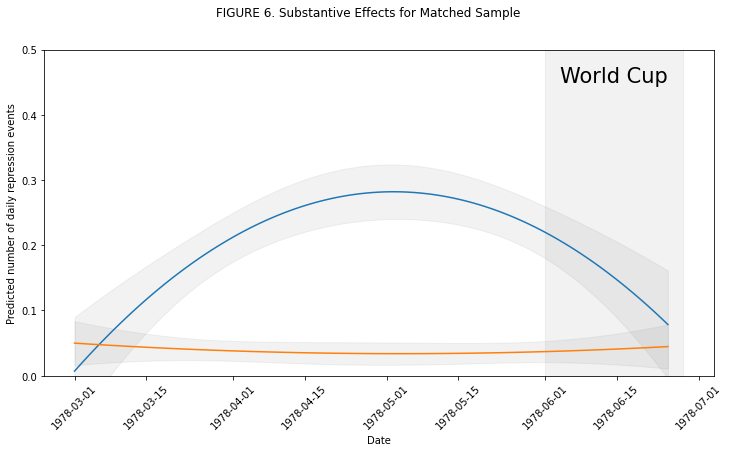

In [34]:
plt.figure(figsize=(12,6))
plt.suptitle("FIGURE 6. Substantive Effects for Matched Sample")
plt.plot(host_df['mean'])
plt.fill_between(host_df.index, host_df['mean_ci_lower'], host_df['mean_ci_upper'], alpha=.1, color='grey')
plt.tick_params(labelrotation=45, axis='x')
plt.plot(matched_nonhost_df['mean'])
plt.fill_between(matched_nonhost_df.index, matched_nonhost_df['mean_ci_lower'], matched_nonhost_df['mean_ci_upper'], alpha=.1, color='grey')
plt.fill_between(pd.date_range('1978-06-01','1978-06-28'), 0, 0.5, alpha=.1, color='grey')
plt.yticks(np.arange(0, 0.6, 0.1))
plt.ylim((0, 0.5))
plt.text(s = "World Cup", x=pd.Timestamp('1978-06-04'), y=0.45, fontsize=21)
plt.ylabel('Predicted number of daily repression events')
plt.xlabel('Date')
plt.show()

Using matched samples, we again see similar results to the ones we saw in Q3, this time with the difference being smaller, which can be explained by the larger average size of the non-host cities.